In [1]:
import argparse
import os
import sys

import numpy as np
import torch
from torch.utils.tensorboard import SummaryWriter
from torch import optim
from torch.nn import CTCLoss
from torch.utils.data.dataloader import DataLoader
from tqdm import tqdm

# from torch.utils.tensorboard import SummaryWriter

import utils
from config import cfg
from generator import Generator
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
data_set = Generator(cfg.word.get_all_words(), 'horizontal')
train_sampler = torch.utils.data.RandomSampler(data_set)
data_loader = DataLoader(data_set, batch_size=128, sampler=train_sampler,
                             num_workers=4)

tensor(125) tensor(8)
(32, 512)
(32, 512, 3)


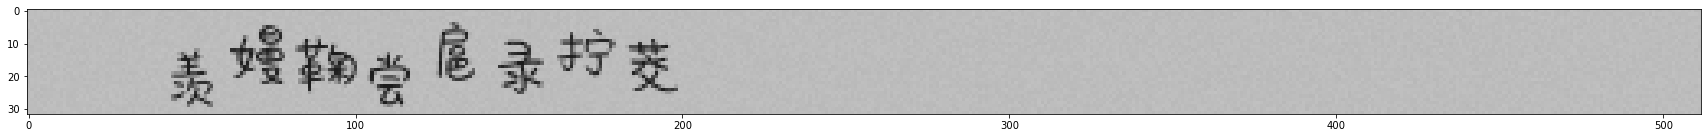

tensor([2630, 5687, 3354, 1386, 3699,  640, 4671, 5501,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0]) tensor(8)
羡嫚鞠尝扈录拧茭                   26


In [7]:
for image, target, input_len, target_len in data_loader:
    print(input_len[0],target_len[0])
    image=image.numpy()
    maxpix=np.max(image)
    minpix=np.min(image)
    image=(image-minpix)/(maxpix-minpix)*255
    image=image[0][0]
    image=image.transpose(1,0)
    break

print(image.shape)
image=np.stack([image,image,image],axis=-1)
print(image.shape)
im=Image.fromarray(np.uint8(image))
im.save("t.jpeg")
plt.figure(1,figsize=(30,500))
plt.imshow(im)
plt.show()
print(target[0],target_len[0])
alpha=data_set.alpha
txt="".join([alpha[i] for i in target[0]])
print(txt,len(txt))

In [154]:
# image, indices, target_len=data_loader(0)


(32, 512, 3)
(32, 512, 3, 3)


TypeError: Cannot handle this data type: (1, 1, 3, 3), |u1

In [33]:
maxpix=np.max(image)
minpix=np.min(image)
image=(image-minpix)/(maxpix-minpix)
image

array([[[[0.34117648, 0.0862745 , 0.21568626, ..., 0.31764707,
          0.19215685, 0.20392156],
         [0.05098039, 0.27450982, 0.20784312, ..., 0.26666668,
          0.09803921, 0.2627451 ],
         [0.3529412 , 0.1372549 , 0.3019608 , ..., 0.18039215,
          0.25490198, 0.3137255 ],
         ...,
         [0.1607843 , 0.18823528, 0.30588236, ..., 0.17254901,
          0.2352941 , 0.1490196 ],
         [0.04313725, 0.2235294 , 0.14509803, ..., 0.17254901,
          0.23137254, 0.12156862],
         [0.2901961 , 0.32941177, 0.13333333, ..., 0.07843137,
          0.18039215, 0.17647058]]],


       [[[0.7294118 , 0.73333335, 0.73333335, ..., 0.73333335,
          0.73333335, 0.73333335],
         [0.73333335, 0.73333335, 0.73333335, ..., 0.73333335,
          0.73333335, 0.7294118 ],
         [0.73333335, 0.7294118 , 0.73333335, ..., 0.73333335,
          0.73333335, 0.7294118 ],
         ...,
         [0.73333335, 0.7294118 , 0.73333335, ..., 0.73333335,
          0.73333335, 0

In [42]:
image[0]

array([[[214.84253],
        [214.84253],
        [214.84253],
        ...,
        [214.84253],
        [214.84253],
        [214.84253]],

       [[214.84253],
        [214.84253],
        [214.84253],
        ...,
        [214.84253],
        [214.84253],
        [214.84253]],

       [[214.84253],
        [214.84253],
        [214.84253],
        ...,
        [214.84253],
        [214.84253],
        [214.84253]],

       ...,

       [[214.84253],
        [214.84253],
        [214.84253],
        ...,
        [214.84253],
        [214.84253],
        [214.84253]],

       [[214.84253],
        [214.84253],
        [214.84253],
        ...,
        [214.84253],
        [214.84253],
        [214.84253]],

       [[214.84253],
        [214.84253],
        [214.84253],
        ...,
        [214.84253],
        [214.84253],
        [214.84253]]], dtype=float32)

 $$ \alpha_{\mathrm{BLANK}}(t, n) =
    \sum_{\pi_{1:t-1}} p(\pi_t = \phi | \pi_{1:t-1}, y_{1:n-1}, \cdots), \\
    \alpha_{\mathrm{LABEL}}(t, n) =
    \sum_{\pi_{1:t-1}} p(\pi_t = y_n | \pi_{1:t-1}, y_{1:n-1}, \cdots$$